University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence
    
# Lab 3: Genetic Algorithms

## The Knapsack problem    


In [73]:
def read_knapsack_data(fname):    
    ''' Read kanpsack instance data
        Input: filename
        Output: number of items, capacity, values and weights
    '''
    with open(fname, 'r') as kfile:  # reads the whole file
        lines = kfile.readlines()     
    values = []; weights = []                 # Empty list to store values and weights 
    bFirst = True 
    for l in lines:
        numbers = list(map(int, l.split()))  # Create list of integers from line      
        if (bFirst):            # First line contains no. if items and capacity 
            numberOfItems = numbers[0]
            capacity = numbers[1]
            bFirst = False
        else:                   # Other lines contain values and weights
            values.append(numbers[0])    
            weights.append(numbers[1])    
    return numberOfItems, capacity, values, weights

In [74]:
# Reading data from a file
knapfile = "knap20.txt"     # filename, should be located in the same directory
numberOfItems, weightCapacity, values, weights = read_knapsack_data(knapfile)
print(f'Number of items: {numberOfItems}. Weight Capacity: {weightCapacity}')
print(f'Values : {values}')
print(f'Weights: {weights}') 

Number of items: 20. Weight Capacity: 878
Values : [44, 46, 90, 72, 91, 40, 75, 35, 8, 54, 78, 40, 77, 15, 61, 17, 75, 29, 75, 63]
Weights: [92, 4, 43, 83, 84, 68, 92, 82, 6, 44, 32, 18, 56, 83, 25, 96, 70, 48, 14, 58]


### Generate Random Solutions

In [75]:
import random as rnd

def random_sol(l):
    '''
       Returns a random solution, binary list, with more proportion of 0s than 1s
       Input: lenght of the list
       Output: binary list
    '''
    sol = rnd.choices([0,1], weights=[15,85], k = l)  
    return sol

### Evaluation Function

In [76]:
def evaluate(sol):
    '''
      Evaluates a solution returning its total value and weight
      Input: solution as a list of binary digits
      Output: total value and weight of the solution
    '''
    total_wei = sum([sol[i] * weights[i] for i in range(numberOfItems)])
    if total_wei > weightCapacity:
        total_val = 0
    else:
        total_val = sum([sol[i] * values[i] for i in range(numberOfItems)])   
    return total_val, total_wei

In [77]:
# Test the functions for generating and evaluatiing solutions and
sol = random_sol(numberOfItems)
print(sol)
print(evaluate(sol))


[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
(0, 880)


## Create an Initial Population

- You are given the code for creating an initial population
- An individual is a list where the first component the solution (binary list) and the 2nd the fitness (value of the knapsack)
- The population will be a list where each member is an individual, so it is a list of lists
- We will sort the population by fitness in increasing fitness.
- So the worst individual will always be the 1st in the population
- Remember that worse individuals are those with lower fitness, as this is a maximisation problem

In [78]:
def create_individual():
    '''
        Creates an individual as a list of two elements: solution and its fitness
    '''
    sol = random_sol(numberOfItems) 
    fit, w = evaluate(sol)
    return [sol, fit]


def create_population(pop_size):
    '''
        Creates an initial population of pop_size randomly generated individuals
        Input:  an integer indicating the population size
        Output: a data structure for the population sorted by fitness
    '''
    pop = [create_individual() for i in range(pop_size)]
    pop.sort(key = lambda x: x[1])  #key is set to sort using second element (Fitness) 
    return pop

### Task 1: Testing the function for creating an initial population
- Create a population called test_pop of size 10
- Show the population


In [79]:
# Add your code here
test_pop = create_population(10)
print(test_pop)

[[[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], 0], [[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], 0], [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], 0], [[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0], [[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], 0], [[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 0], [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], 0], [[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], 772], [[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], 819], [[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 875]]


### Practice 
- Let us practice how to access elements in the population
- Run the cells below and check the results

In [80]:
# Access the first individial in the population.
# Arrays starts with '0'
test_pop[0]

[[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], 0]

In [81]:
# Access the fitness of the 2nd member in the population
test_pop[1][1]

0

In [82]:
# Access the solution vector of the 3rd member of the population
test_pop[2][0]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

### Mutation Operator

- You are given the code to generate a random mutation of a given solution
- Notice that this is similar to the neighbour operation used for hill-climbing

In [83]:
def mutation(sol):   
    ''' Generate a random 1-bit flip mutant of the given solution
        Input:  Solution as binary list
        Output: Mutated solution
    '''    
    mutant = sol.copy()                     # copy solution
    i = rnd.randint(0, numberOfItems-1)
    # alter position i if 0 assign 1,else assign 1
    if mutant[i] == 1:
        mutant[i] = 0
    else:
        mutant[i] = 1
    return mutant

### Test 
- Let us test the mutation operator
- Run the cell below and check the results

In [84]:
# Testing the mutation operation
sol = test_pop[2][0]
print("Solution: ", sol)
mut = mutation(sol)
print("Mutant:   " , mut)

Solution:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Mutant:    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


## Task 2: Implement Tournament Selection of Size two

- Your task is to implement a tournament selection function, where the size of the tournament is two
- This function selects two potential individuals at random from the population and returns the solution with the best fitness of the two.

In [85]:
def tournament(pop):
    ''' Compares the fitness of two randomly selected individuals in the population and returns 
        the best of the two
        Input:  the population data structure 
        ouptut: the solution (binary list) of the selected individual
    '''
    # Add your code here
    # select to random individual among the population
    individual1PositionInPopulation = rnd.randint(0, len(pop) - 1)
    individual2PositionInPopulation = rnd.randint(0, len(pop) - 1)
    if individual2PositionInPopulation == individual1PositionInPopulation:
        individual2PositionInPopulation = (individual2PositionInPopulation + 1) % len(pop)
    #return the solution with the best fitness of the two selected individuals
    fitnessIndividual1 = pop[individual1PositionInPopulation][1]
    fitnessIndividual2 = pop[individual2PositionInPopulation][1]
    if fitnessIndividual1 > fitnessIndividual2:
        sol = pop[individual1PositionInPopulation][0]
    else:
        sol = pop[individual2PositionInPopulation][0]
    return sol


### Test 
- Let us test the tournament function
- Run the cell below and check the results

In [86]:
# Test the tournament function with the test_population previously created
tournament(test_pop)

[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

## Task 3: Crossover Operator - 1 point crossover

- Implement one-point crossover between two parent solutions.
- Your function should pick a single crossover point and copy the first part of the solution from the first parent and the 2nd part (after the crossover point) from the second parent

In [87]:
def crossover(p1, p2):  
    ''' Performs a 1-point crossover of the two given solutions
        Input:  Two solutions (binary lists) as parents
        Ouptut: One child applying one-point crossover.
    '''
     # Add your code here
    crossoverPoint = rnd.randint(1, len(p1) - 2) # crossover point cannot be the first or last position in 
                                                 # the solution because otherwise the solutions swap places 
                                                 # but no new solution is created
    firstPortionOfChild = p1[0:crossoverPoint] # notion [x:y] slices a portion of a list: x included, y excluded
    secondPortionOfChild = p2[crossoverPoint : len(p2)]
    child = firstPortionOfChild + secondPortionOfChild
    return child

### Test 
- Let us test the crossover function
- Run the cell below and check the results

In [88]:
# Testing the crossover operator
parent1 = test_pop[1][0] # references to parent
parent2 = test_pop[3][0]
print("Parents:")
print(parent1)
print(parent2)

child = crossover(parent1, parent2)

print("Child:")
print(child)

Parents:
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Child:
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]


## Task 5: Implement a Genetic Algorithm,
- Your task is to implement a steady-state genetic algorithm using the various functions implemented above.
- Here is the Pseudocode of a steady-state genetic algorithm

>P = Generate_initial_population(pop_size)   
>For a fixed number of iterations do
>>mom = Tournament_selection(P) <br>
>>dad = Tournament_selection(P) <br>
>>child = crossover(mom, dad)    
>>child = Mutate(child)  
>>Evaluate_individual(child)<br>
>> Replace_worst(P, child) <br>

### Tips:
- Notice that the population will be sorted after initialisation
- However, after each iteration, since we are adding a new individual, you need to sort it again
- Notice, if we sort the population at each iteration:
    - The worst individual (low fitness) will always be the first index in the population
    - The best individual will always be the last index in the population
- Add a variable list called 'trace' to your algorithm in order to keep the fitness (value) of the best found individual at each iteration

In [89]:
def genetic_algorithm(maxiter):
    ''' 
       Run the GA for for a maximum number of iterations
       Input:  Integer representing the maximum number of iterations
       Output: The best solution found at the end of the run, 
               A trace of the values (fitness) of the best individual at each iteration
    '''   
    # Add your code here
    populationSize = 100 # define the population size
    population = create_population(populationSize)
    fitnessTrace = []
    iterations = []
    for iteration in range(maxiter):
        iterations.append(iteration + 1)
        momSolution = tournament(population)
        dadSolution = tournament(population)
        childSolution = crossover(momSolution, dadSolution)
        childMutation = mutation(childSolution)
        childMutationFitness = evaluate(childMutation)[0]
        # replace the worst (least fit) individual in the population with the child mutation
        population[0] = [childMutation, childMutationFitness]
        population.sort(key = lambda x: x[1]) # key is set to sort using second element (Fitness), 
                                            # reverse is = ascending by default
                                            # lambda is a keyword that allows you to create small anonymous functions
                                            # The general syntax of a lambda function is lambda arguments: expression
        # add the best individual from this iteration to the trace (see if i can code to add it only if it's different)
        fitnessTrace.append(population[-1][1])
    return population[populationSize - 1], fitnessTrace, iterations

## Task 6: Use the Genetic Algorithm
- Using the genetic_algorithm function to solve the knapsack instance
- Experiment with several values of the number of maximum iterations
- Print best solution found after the run
- What is the best value you can get after running the genetic algorithm?
- Can you obtain better results than by runing a hill_climber? (as you did in Lab 2)

In [95]:
# Add your code here
iterations = 100
bestSolution, fitnessTrace, iterations = genetic_algorithm(iterations)
print(bestSolution)

[[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 995]


### Task 7: Plot the trace of the best individuals 
- Use the trace produced by the algorithm and plot it as a line plot with markers
- Can you see a trend of improving the values across the search process?


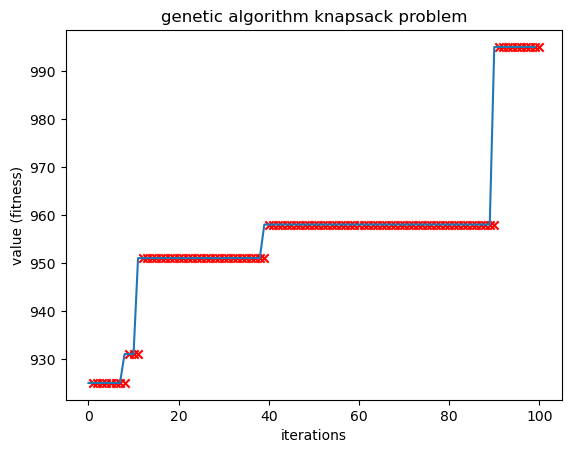

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

# Add your code here
plt.title("genetic algorithm knapsack problem")
plt.xlabel("iterations")
plt.ylabel("value (fitness)")
plt.plot(fitnessTrace)
plt.scatter(iterations, fitnessTrace, marker = "x", color = "red")